In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import glob
#import torch
import sklearn
import sklearn.metrics
import paper.utils.metrics


ModuleNotFoundError: No module named 'torch'

In [165]:
# Plots accuracy, ood and confusion for a given dataset
#colors = ["#244C5B", "#EBB57C", "#C2504C", "#439888"]
pastel_colors = ['#F9B9AC', '#EAECC6', '#FFDBBE', '#FFEDB3', '#C4DF9B', '#AEE1E1', '#B0D8FF', '#B7B6E5', '#D7B8FF', '#FFB9D3', '#FFC6A2', '#FFEBAF', '#D1E2E5', '#C2D1E9', '#D9C3E6', '#E1C3C3', '#F3B9B9', '#F8E9A1', '#B1E7B6', '#B2B7F2']
pastel_colors = ['#CC4D19', '#CC9966', '#1E8B7A', '#704689', '#CCCC66', '#4D7326']
colors = ['darkred', 'darkorange', "darkgreen", "darkblue"]


def plot_accuracies(DATASETS, DISTANCE_TYPES, THRESHOLDS, SHUFFLED, 
                    PROBABILITY, labels, palette, max_points, savepath, window = 1, log=True):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    handles = []
    zoom = max_points
    for dataset, color in zip(DATASETS, palette):
        hs = []
        for distance, threshold in zip(DISTANCE_TYPES, THRESHOLDS):
            if dataset == "CORE50":
                dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_{SHUFFLED}_p{PROBABILITY}_slFalse_complete/metrics_{format(threshold, '.2f')}.csv"
            else:
                dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_{SHUFFLED}_p{PROBABILITY}_slFalse/metrics_{format(threshold, '.2f')}.csv"
                
            df = pd.read_csv(dir_path) 
            print(len(df), dir_path)
            if distance =="inverse_cosine":
                ls = "--"
                label = f"{dataset} CosDis" 
                
            else:
                ls = "-"
                label = f"{dataset} l2" 
                
            idx = df['accuracy'].values > 0
            acc = df['accuracy'].values[idx][::len(df)//max_points]
            
            idx_moving_avg = df['moving_avg'].values > 0
            moving_avg = df['moving_avg'].values[idx_moving_avg]
            moving_avg = [moving_avg[i:i+window].mean() for i in range(len(moving_avg))]
            moving_avg = moving_avg[::len(df)//max_points]

            temp = ax[0].plot(acc,
                       label=f"ACC = {round(df['accuracy'].values[-1],3)}", 
                       alpha = 0.8, color = color, lw = 3, ls = ls)
            hs.append(temp[0])
            print(f"{dataset}, {distance}, {acc[-1]}")
            ax[1].plot(moving_avg,
                       label=f"{label}, ACC = {round(moving_avg[-window], 3)}",
                       alpha = 0.8, color = color, lw = 3, ls = ls)
        handles.append(hs)
        
    ax[0].set_title('Accuracy ↑', fontsize = 20)
    ax[0].set_xlim(0, zoom-window)
    ax[0].set_ylim(0.4, 1.1)
    if log:
        ax[0,0].set_yscale("log")
    ax[0].grid(True)
    ax[0].tick_params( labelright=True)
    
    legend2 = ax[0].legend(handles[0], DISTANCE_TYPES)
    ax[0].legend([h[0] for h in handles], DATASETS, loc = "lower right")
    ax[0].add_artist(legend2)
    ax[0].set_xlabel("Time", fontsize = 16)
    ax[0].set_ylabel("Accuracy", fontsize = 16)
    
    
    ax[1].set_title('Moving Avg. Acc. ↑', fontsize = 20)
    ax[1].set_xlim(0, zoom-window)
    ax[1].set_ylim(0.4, 1.1)
    if log:
        ax[1,1].set_yscale("log")
    #ax[1].legend()
    ax[1].grid(True)
    ax[1].set_xlabel("Time", fontsize = 16)
    #ax[1].set_ylabel("Accuracy", fontsize = 14)
    ax[1].tick_params( labelright=True)
    plt.savefig(savepath+"accuracy.pdf", bbox_inches='tight')

      
        


# Shuffled

**Accuracies**

162600 paper/results/CelebA_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv
CelebA, l2, 0.7732348026579967
162600 paper/results/CelebA_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv
CelebA, inverse_cosine, 0.7793357598994831
49800 paper/results/CIFAR100_l2_1_openCLIP_shuffled_p100_slFalse/metrics_18.00.csv
CIFAR100, l2, 0.8634406438631791
49800 paper/results/CIFAR100_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/metrics_0.40.csv
CIFAR100, inverse_cosine, 0.8656941649899397
23800 paper/results/CORE50_l2_1_openCLIP_shuffled_p100_slFalse_complete/metrics_18.00.csv
CORE50, l2, 0.9703669454835864
33000 paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p100_slFalse_complete/metrics_0.40.csv
CORE50, inverse_cosine, 0.9720226728501712


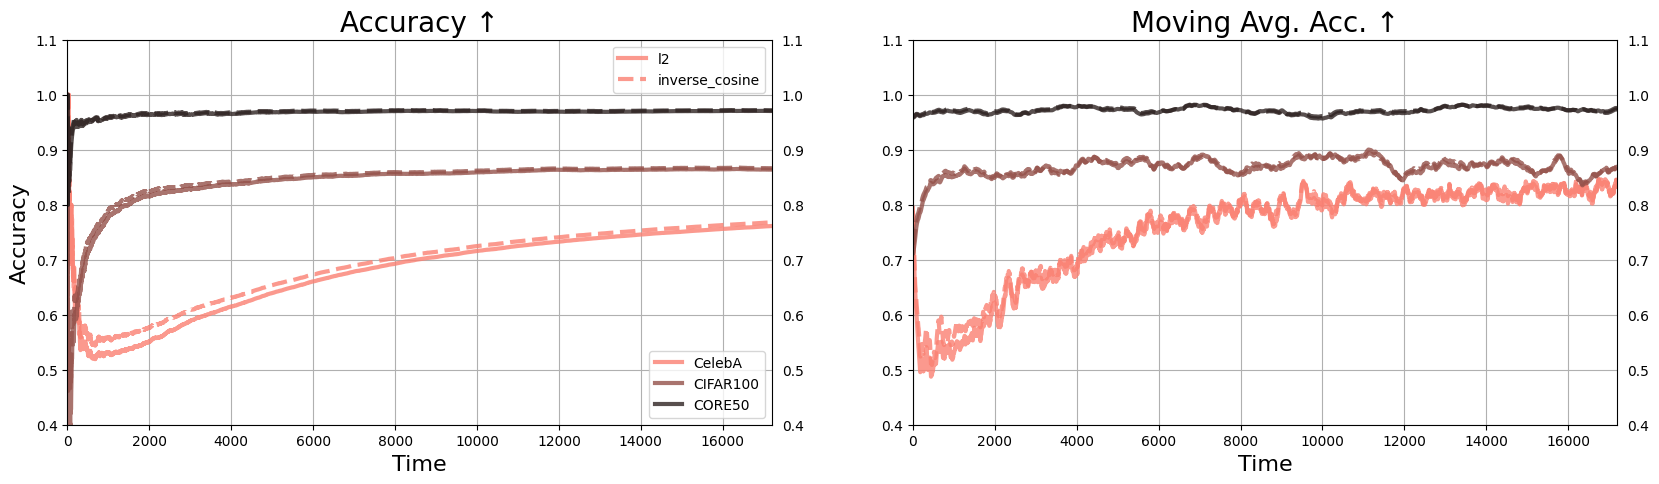

In [169]:
DATASETS = ['CelebA', "CIFAR100", "CORE50"]#, "GTSRB"]
DISTANCE_TYPES = ['l2', "inverse_cosine"]
THRESHOLDS = [18, 0.4]

SHUFFLED = 'shuffled'
PROBABILITY = '100'

LABELS = ["l2", "CosDist"]*2

MAX_POINTS = 18400

SHUFFLED = 'shuffled'
PROBABILITY = '100'
palette = sns.color_palette("dark:salmon_r", 3)


plot_accuracies(DATASETS, DISTANCE_TYPES, THRESHOLDS, SHUFFLED, PROBABILITY, LABELS, palette, MAX_POINTS, savepath=f"paper/results/All_1_openCLIP_{SHUFFLED}_p{PROBABILITY}_slFalse_",  window = 1200, log=False)

**selflabeling**


400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400
400 inverse_cosine 400


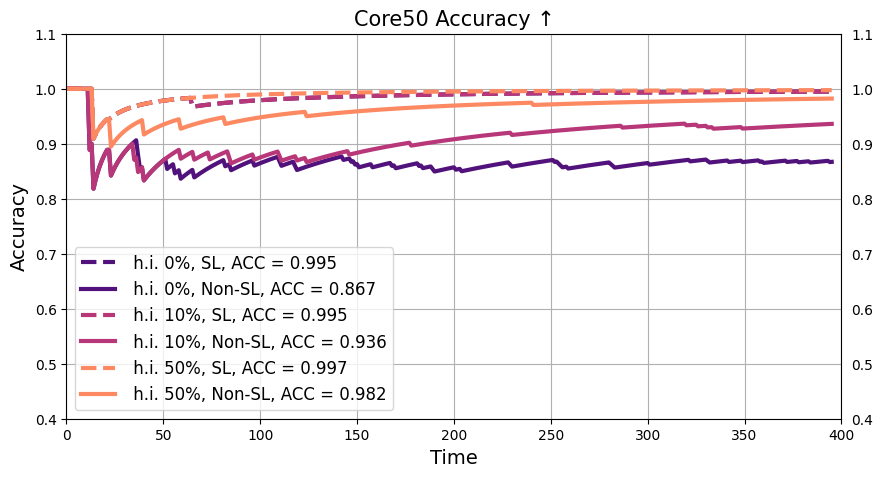

In [173]:
import seaborn as sns
def plot_accuracies_self_learning(dataset, SELFLABELLINGS, THRESHOLDS, SHUFFLED, 
                    PROBABILITY, labels, max_points, savepath, window = 1, log=True):
    
    palette = sns.color_palette("magma", 3)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    handles = []
    threshold = 0.4
    distance = "inverse_cosine"
    zoom = max_points
    for probability, color in zip(PROBABILITIES, palette):
        hs = []
        for selflabelling in SELFLABELLINGS:
            dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_{SHUFFLED}_p{probability}_sl{selflabelling}/metrics_{format(threshold, '.2f')}.csv"
            df = pd.read_csv(dir_path) 
            print(len(df), distance, max_points)
            label = f" h.i. {probability}%"
            if selflabelling =="True":
                ls = "--"
                label += f", SL" 
                
            else:
                ls = "-"
                label += f", Non-SL" 
            #label += f", h.i. {probability}%"
            idx = df['accuracy'].values > 0
            acc = df['accuracy'].values[idx][::len(df)//max_points]

            idx_moving_avg = df['moving_avg'].values > 0
            moving_avg = df['moving_avg'].values[idx_moving_avg]
            moving_avg = [moving_avg[i:i+window].mean() for i in range(len(moving_avg))]
            moving_avg = moving_avg[::len(df)//max_points]


            temp = ax.plot(acc,
                       label=label + f", ACC = {round(df['accuracy'].values[-1],3)}",
                    color = color, lw = 3, ls = ls)
            hs.append(temp[0])
            
            #ax[1].plot(moving_avg,
            #           label=f"{label}, ACC = {round(moving_avg[-window], 3)}",
            #           alpha = 0.8, color = color, lw = 3, ls = ls)
        handles.append(hs)
        
    ax.set_title('Core50 Accuracy ↑', fontsize = 15)
    ax.set_xlim(0, zoom)
    ax.set_ylim(0.4, 1.1)
    if log:
        ax[0,0].set_yscale("log")
    ax.grid(True)
    ax.tick_params( labelright=True)
    ax.set_xlabel("Time", fontsize = 14)
    ax.set_ylabel("Accuracy", fontsize = 14)
    #legend2 = ax[0].legend(handles[0], ["Self-Labelling" if s=="True" else "Non-Self-Lablelling" for s in SELFLABELLINGS])
    #ax.legend([h[1] for h in handles], ["Interaction: " + p + "%" for p in PROBABILITIES], loc = "lower right")
    #ax.add_artist(legend2)
    plt.legend(fontsize = 12)
    
    #ax[1].set_title(dataset +' Moving Avg. Acc. ↑', fontsize = 15)
    #ax[1].set_xlim(0, zoom-window)
    #ax[1].set_ylim(0, 1.1)
    #if log:
    #    ax[1,1].set_yscale("log")
    #ax[1].legend()
    #ax[1].grid(True)
    #ax[1].tick_params( labelright=True)
    plt.savefig(savepath+"accuracy.pdf", bbox_inches='tight')


dataset = 'CORE50'
LABELS = ["Selflabelled, h.i. 0%", "Non-selflabelled, h.i. 0%", "Selflabelled, h.i. 10%", "Non-selflabelled, h.i. 10%", ]

MAX_POINTS = 400
THRESHOLDS = [18, 0.4]

SHUFFLED = 'shuffled'
PROBABILITIES = ['0', "10", "50"]
SELFLABELLINGS = ["True", "False"]

plot_accuracies_self_learning(dataset, SELFLABELLINGS, THRESHOLDS, SHUFFLED, PROBABILITIES, LABELS, MAX_POINTS, savepath=f"paper/results/{dataset}_openCLIP_selflabelling_",  window = 1, log=False)


**OOD**

paper/results/CORE50_l2_1_openCLIP_shuffled_p100_slFalse/
CORE50, l2
OOD: 0.9, Precision: 0.9
paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/
CORE50, inverse_cosine
OOD: 0.8, Precision: 0.8888888888888888
paper/results/CIFAR100_l2_1_openCLIP_shuffled_p100_slFalse/
CIFAR100, l2
OOD: 0.37, Precision: 0.6491228070175439
paper/results/CIFAR100_inverse_cosine_1_openCLIP_shuffled_p100_slFalse/
CIFAR100, inverse_cosine
OOD: 0.4, Precision: 0.07547169811320754


/tmp/ipykernel_128965/2586691557.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


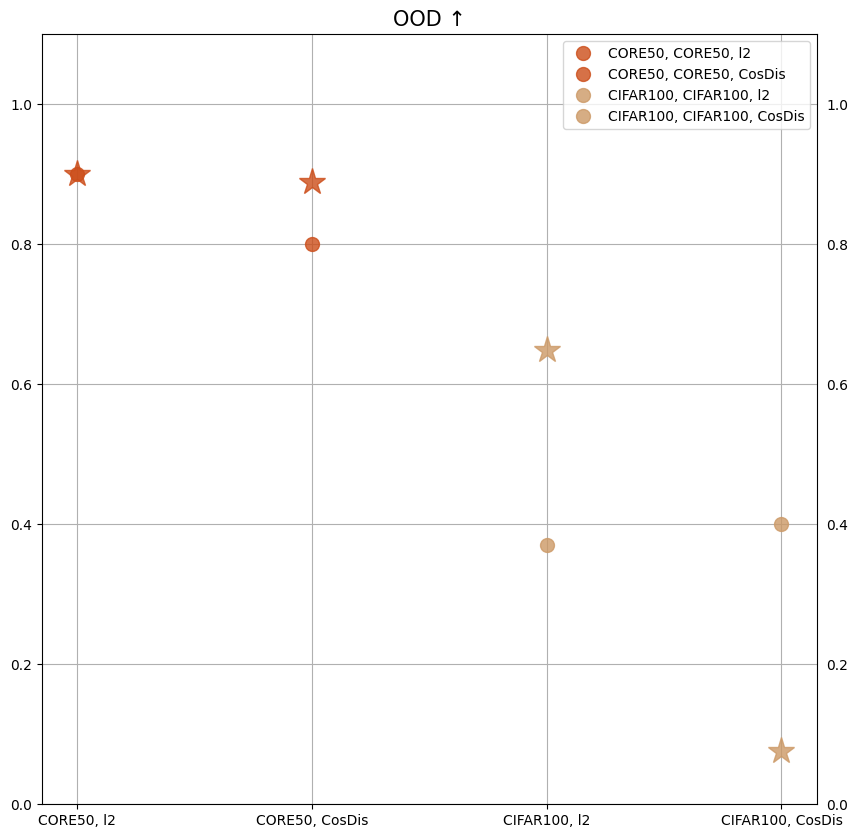

In [63]:
def plot_OOD(DATASETS, THRESHOLDS, DISTANCES, markersize, log=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    count = 0
    labels = []
    for i, (dataset, color) in enumerate(zip(DATASETS, pastel_colors)):
        for j, (distance, threshold) in enumerate(zip(DISTANCES, THRESHOLDS)):
            label = f"{dataset}, "
            if distance == "inverse_cosine":
                label += "CosDis"
            else:
                label += "l2"
            count += 1
            dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_shuffled_p100_slFalse/" 
            print(dir_path)
            with open(dir_path + f"matrix_t{format(threshold, '.2f')}.pkl", "rb") as f:
                m = pkl.load(f)
                precision = m.ood_confusion_matrix[0, 0]/(m.ood_confusion_matrix[0, 0]+m.ood_confusion_matrix[0, 1])
                OOD = m.ood_confusion_matrix[0, 0]/(m.ood_confusion_matrix[0, 0]+m.ood_confusion_matrix[1, 0])
            df = pd.read_csv(dir_path + f"metrics_{format(threshold, '.2f')}.csv")
            #print(df['ood'].values[-1], df['type1_ood_error'].values[-1], label)
            print(f"{dataset}, {distance}")
            print(f"OOD: {OOD}, Precision: {precision}")
 
            
            ax.plot(count, OOD, label=f"{dataset}, {label}", alpha = 0.8, color = color, ls = "", marker = ".", markersize = markersize)
            ax.plot(count, precision, alpha = 0.8, color = color, ls = "", marker = "*", markersize = markersize)
            labels.append(label)
    ax.set_title('OOD ↑', fontsize = 15)
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(True)
    ax.tick_params( labelright=True)
    ax.set_xticklabels(labels)
    ax.set_xticks(range(1,len(labels)+1))
    
DATASETS = ["CORE50",'CIFAR100']#, "GTSRB"]
DISTANCE_TYPES = ['l2', "inverse_cosine"]
#LABELS = ["CORE50 l2", "CORE50 CosDist","CIFAR100 l2", "CIFAR100 CosDist","CelebA l2", "CelebA CosDist"]
PROCESSING_FRAMES = 1
THRESHOLDS = [18, 0.4]

plot_OOD(DATASETS, THRESHOLDS, DISTANCE_TYPES, markersize=20)

# Ordered

499 inverse_cosine 499
499 inverse_cosine 499


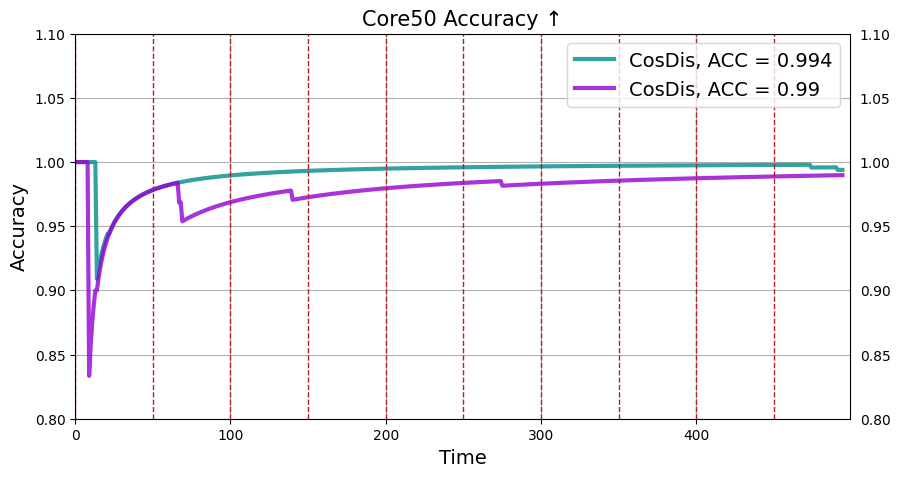

In [172]:
def plot_accuracies_ordered(THRESHOLDS, SHUFFLED, 
                    DISTANCES, labels, max_points, savepath, window = 1, log=True):
    colors = ['darkcyan', 'darkviolet']#, "darkgreen", "darkblue"]
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    handles = []
    threshold = 0.4
    distance = "inverse_cosine"
    zoom = max_points
    dataset = "CORE50"
    labels = []
    for shuffled, color in zip(SHUFFLED, colors):
        hs = []
        for (distance, threshold) in zip(DISTANCES, THRESHOLDS):
            dir_path = f"paper/results/{dataset}_{distance}_1_openCLIP_{shuffled}_p100_slFalse/metrics_{format(threshold, '.2f')}.csv"
            df = pd.read_csv(dir_path) 
            print(len(df), distance, max_points)
            if distance =="inverse_cosine":
                ls = "-"
                labels.append(f"CosDis") 
                
            else:
                ls = "-"
                labels.append(f"l2") 
            #label += f", interaction {probability}%"
            idx = df['accuracy'].values > 0
            acc = df['accuracy'].values[idx][::len(df)//max_points]

            idx_moving_avg = df['moving_avg'].values > 0
            moving_avg = df['moving_avg'].values[idx_moving_avg]
            moving_avg = [moving_avg[i:i+window].mean() for i in range(len(moving_avg))]
            moving_avg = moving_avg[::len(df)//max_points]


            temp = ax.plot(acc,
                       label=labels[-1] +f", ACC = {round(df['accuracy'].values[-1],3)}", 
                       alpha = 0.8, color = color, lw = 3, ls = ls)
            hs.append(temp)
            
            #ax[1].plot(moving_avg,
            #           label=f"{labels[-1]}, ACC = {round(moving_avg[-window], 3)}",
            #           alpha = 0.8, color = color, lw = 3, ls = ls)
        handles.append(hs)
        
    ax.set_title('Core50 Accuracy ↑', fontsize = 15)
    ax.set_xlim(0, zoom)
    ax.set_ylim(0.8, 1.1)
    for x in np.arange(0, max_points, 50):
        ax.axvline(x, color = "firebrick", ls = "--", linewidth = "1")
    if log:
        ax[0,0].set_yscale("log")
    ax.grid(True)
    ax.tick_params( labelright=True)
    ax.set_xlabel("Time", fontsize = 14)
    ax.set_ylabel("Accuracy", fontsize = 14)
    plt.legend(fontsize = 14)
    
    #legend2 = ax.legend(handles[0], labels)
    #ax.legend([h[0] for h in handles], SHUFFLED, loc = "lower right")
    #ax.add_artist(legend2)
    
    
    #for x in np.arange(0, max_points, 50):
    #    ax[1].axvline(x, color = "firebrick", ls = "--", linewidth = "0.5")
    #ax[1].set_title(dataset +' Moving Avg. Acc. ↑', fontsize = 15)
    #ax[1].set_xlim(0, zoom-window)
    #ax[1].set_ylim(0.8, 1.1)
    #if log:
    #    ax[1,1].set_yscale("log")
    #ax[1].legend()
    #ax[1].grid(True)
    #ax[1].tick_params( labelright=True)
    plt.savefig(savepath+"accuracy.pdf", bbox_inches='tight')


dataset = 'Flowers102'
LABELS = ["Shuffled, CosDis", "Ordered CosDis", "Shuffled l2", "Ordered l2", ]
SHUFFLED
MAX_POINTS = 499
THRESHOLDS = [ 0.4]
DISTANCES = ["inverse_cosine"]
SHUFFLED = ['shuffled', "ordered"]

SELFLABELLINGS = ["True", "False"]

plot_accuracies_ordered(THRESHOLDS, SHUFFLED, DISTANCES, LABELS, MAX_POINTS, savepath=f"paper/results/CORE50_openCLIP_ordered_",  window = 1, log=False)

# OOD precision curve


/home/luigi/Work/Brainiac/paper/results/CORE50_l2_1_openCLIP_shuffled_p100_slFalse
[13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 19.0, 19.5]
0.10204081632653061 1.0
0.12987012987012986 1.0
0.18181818181818182 1.0
0.24390243902439024 1.0
0.30303030303030304 1.0
0.38461538461538464 1.0
0.47368421052631576 0.9
0.5625 0.9
0.6428571428571429 0.9
0.75 0.9
0.9 0.9
1.0 0.6
1.0 0.5
13.0 0.10204081632653061 1.0
13.5 0.12987012987012986 1.0
14.0 0.18181818181818182 1.0
14.5 0.24390243902439024 1.0
15.0 0.30303030303030304 1.0
15.5 0.38461538461538464 1.0
16.0 0.47368421052631576 0.9
16.5 0.5625 0.9
17.0 0.6428571428571429 0.9
17.5 0.75 0.9
18.0 0.9 0.9
19.0 1.0 0.6
19.5 1.0 0.5
/home/luigi/Work/Brainiac/paper/results/CORE50_inverse_cosine_1_openCLIP_shuffled_p100_slFalse
[0.1, 0.12, 0.15, 0.18, 0.2, 0.22, 0.25, 0.28, 0.3, 0.32, 0.35, 0.38, 0.4, 0.44, 0.48, 0.52, 0.58]
0.02610966057441253 1.0
0.028011204481792718 1.0
0.03717472118959108 1.0
0.05917159763313609 1.0
0.0819672131

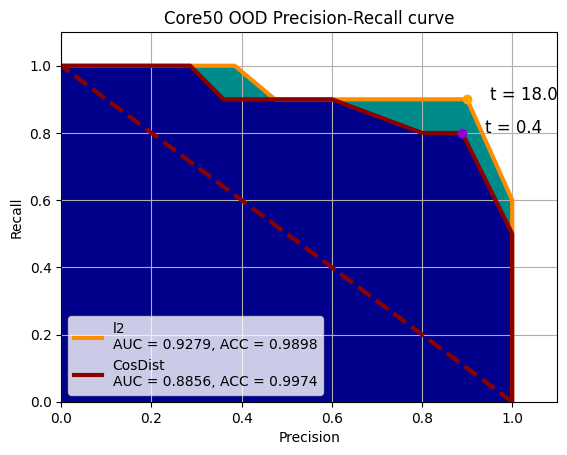

In [171]:
DISTANCE_TYPES = ["l2", "inverse_cosine"]
labels = ["l2", "CosDist"]
DATASET = 'CORE50'

colors_dots = ["#E37D43", '#FFB6C1']#, '#32212B']
colors_line = ['#98292B', '#C1E1C1']#, '#428362']
colors_fill = ["#26868E", "#77B342"]#, '#ADD8E6']

colors_dots = ["orange", 'darkviolet']#, '#32212B']
colors_line = ['darkorange','darkred', ]#, '#428362']
colors_fill = ["darkcyan", "darkblue"]#, '#ADD8E6']


for i, distance in enumerate(DISTANCE_TYPES):
    OODs = [1] #OOD = Recall
    precision = [0] #precision
    distances_from_v = [1]
    color_dots = colors_dots[i]
    color_line = colors_line[i]
    color_fill = colors_fill[i]
    dir_path = f"/home/luigi/Work/Brainiac/paper/results/{DATASET}_{distance}_1_openCLIP_shuffled_p100_slFalse"
    print(dir_path)
    paths = glob.glob(dir_path + "/*.pkl")
    thresholds =  [float(".".join(p.split("_")[-1].split(".")[:-1])[1:]) for p in paths]
    thresholds.sort()
    path = dir_path + f"/matrix_t"
    matrices_paths = [path + f"{format(t, '.2f')}.pkl" for t in thresholds]
    print(thresholds)
    for j, p in enumerate(matrices_paths):
        with open(p, "rb") as f:
            m = pkl.load(f)
            precision.append(m.ood_confusion_matrix[0, 0]/(m.ood_confusion_matrix[0, 0]+m.ood_confusion_matrix[0, 1]))
            OODs.append(m.ood_confusion_matrix[0, 0]/(m.ood_confusion_matrix[0, 0]+m.ood_confusion_matrix[1, 0]))
            print(precision[-1], OODs[-1])
    thresholds = [0] + thresholds
    precision.append(1.)
    OODs.append(0.)
    
    AUC = sklearn.metrics.auc(precision, OODs)
   
    plt.plot(precision, OODs, color = color_line, lw = "3", label = f"{labels[i]}\nAUC = {round(AUC, 4)}, ACC = {round(m.accuracy(), 4)}")
    plt.fill_between(precision, OODs, color = color_fill)
    for k, t in enumerate(thresholds):
        if t == 0:
            continue
        print(t, precision[k], OODs[k])
        distances_from_v.append(np.sqrt((1-OODs[k])**2 + (1-precision[k])**2))
    min_idx = np.argmin(distances_from_v)
    
    plt.plot(precision[min_idx], OODs[min_idx], color = color_dots, marker = "o", )
    plt.text(0.05+precision[min_idx], OODs[min_idx], f"t = {str(round(thresholds[min_idx], 2))}", fontsize = 12)
   
plt.legend(loc = 'lower left')
xmin = 0.
ymin = 0.
plt.plot(np.arange(xmin, 1.1, 0.1)[::-1], np.arange(xmin, 1.1, 0.1),color = color_line, ls = "--", lw = "3")

plt.xlim([xmin, 1.1])
plt.ylim([ymin, 1.1])
#plt.xscale("log")
#plt.yscale("log")
plt.grid()

plt.title("Core50 OOD Precision-Recall curve")
plt.ylabel('Recall')
plt.xlabel('Precision')
#plt.show()

plt.savefig(f"{ '/'.join(dir_path.split('/')[:-1])}/recall_vs_precision_{DATASET}.pdf")
